In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Treasury import Treasury
from Portfolio import Portfolio
from risk_free_rate import get_risk_free_rate

# Long  Only Portfolio With Only ETFs

In [2]:
SPY = ETF("SPY")
XLB = ETF("XLB")
XLF = ETF("XLF")
XLP = ETF("XLP")
XLY = ETF("XLY")
XLE = ETF("XLE")
XLI = ETF("XLI")
XLK = ETF("XLK")
XLU = ETF("XLU")
XLV = ETF("XLV")

all_etfs = [XLB, XLF, XLP, XLY, XLE, XLI, XLK, XLU, XLV]


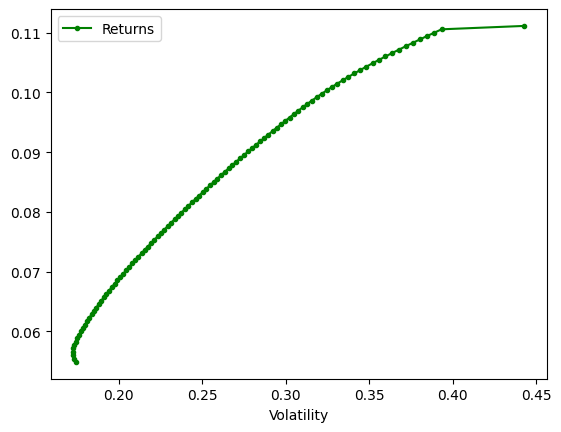

In [3]:
portfolio = Portfolio(all_etfs, rf = get_risk_free_rate('2008-05-06'), equity_benchmark = SPY)
portfolio.filter(startDate="2008-01-01", endDate="2024-01-01", period=1)
max_sharpe_ratio, ret, vol, weights = portfolio.max_sharpe_portfolio(n_points=100, min_weight=0, max_weight=1.0)
portfolio.plot_ef(n_points = 100, min_weight=0, max_weight=1.0)


In [4]:
print("MSR portfolio weights: " + str(weights))
print("MSR portfolio expected annualized log return: " + str(ret))
print("MSR portfolio annualized volatility of log returns: " + str(vol))
print("Sharpe Ratio of Portfolio: "+str(max_sharpe_ratio))
print("MSR portfolio VaR: "+str(portfolio.portfolio_VaR(weights)))
print("MSR portfolio ES: "+str(portfolio.portfolio_ES(weights)))
print()

MSR portfolio weights: [0.07305841 0.08061498 0.03445702 0.04785648 0.06171841 0.07075438
 0.33343975 0.10125328 0.19684727]
MSR portfolio expected annualized log return: 0.08328567644753945
MSR portfolio annualized volatility of log returns: 0.2501663543602025
Sharpe Ratio of Portfolio: 0.26317992686187
MSR portfolio VaR: 0.4114870353106063
MSR portfolio ES: 0.5160213431462308



In [5]:
# Filters data to only 2020 election cycle
portfolio.filter(startDate="2020-01-01", endDate="2021-01-01", period=1)
portfolio.set_rf(get_risk_free_rate('2020-05-05'))
# See how the calculated weights using data up to 2016 election would have worked
# for the 2020 election
print("2020 election period actual annualized log returns: " + str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2019 (6.5 month period of a non-election year)
portfolio.filter(startDate="2019-05-05", endDate="2019-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2019-05-06'))
print("2019 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2018 (6.5 month period of a non-election year)
portfolio.filter(startDate="2018-05-05", endDate="2018-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2018-05-07'))
print("2018 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))


# Filters data to May 5 to November 17 of 2017 (6.5 month period of a non-election year)
portfolio.filter(startDate="2017-05-05", endDate="2017-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2017-05-05'))
print("2017 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

2020 election period actual annualized log returns: 0.43348952204474733
2019 May 5 to November 17 actual annualized log returns: 0.14298679129458292
2018 May 5 to November 17 actual annualized log returns: 0.07004978386556455
2017 May 5 to November 17 actual annualized log returns: 0.1848545403144799
